# Customer Segmentation 

## Introduction to Customer Segmentation

Customer segmentation is a powerful technique in data science that enables businesses to categorize their customers into distinct groups based on shared characteristics. This approach is pivotal in understanding customer behavior, optimizing marketing strategies, and enhancing customer service. In this assignment, we will delve into the practical application of customer segmentation using machine learning algorithms.

- **Significance of Customer Segmentation**:
  - **Targeted Marketing**: Tailoring marketing campaigns to specific customer groups based on their purchasing behavior and preferences.
  - **Product Customization**: Developing products and services that cater to the specific needs and desires of different customer segments.
  - **Improved Customer Experience**: Delivering personalized experiences to customers, increasing satisfaction and loyalty.

The example code provided serves as a starting point for this exploration. It demonstrates the application of K-Means clustering, a popular technique in machine learning for grouping data. This algorithm partitions customers into clusters based on features like transaction amount, account balance, and transaction frequency.

- **Key Techniques and Concepts**:
  - **K-Means Clustering**: Understand and apply K-Means to segment customers.
  - **Data Standardization**: Learn the importance of scaling features for effective clustering.
  - **Cluster Visualization**: Gain skills in visualizing the clusters to extract meaningful insights.

Students are encouraged to expand upon this initial code by experimenting with different numbers of clusters, applying additional clustering techniques like Hierarchical Clustering and DBSCAN, and performing a thorough analysis of the clusters to understand their business implications. This assignment is not only a technical task but also a venture into strategic business analysis through the lens of data science.


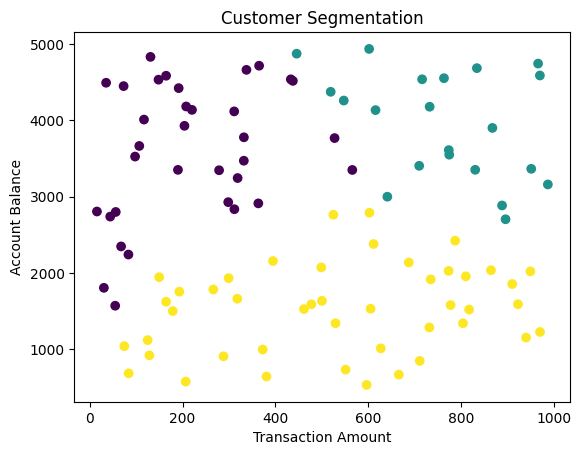

   TransactionAmount  AccountBalance  TransactionFrequency
0         219.104965     3605.076278              5.382353
1         763.371903     3941.642487              4.714286
2         534.833662     1526.159772              4.688889


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data 
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may want to experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)

## Customer Segmentation Coding Assignment

### Main Assignment (100 points total)

#### 1. Data Exploration and Analysis (20 points)
- **Background**: Understanding the dataset's structure and key characteristics.
- **Tasks**:
  - Explore the distribution of features like 'Annual Income' and 'Spending Score'.
  - Identify any interesting patterns or insights from the data.
- **Points**: Detailed analysis and insights from data exploration.

#### 2. Enhanced Clustering with K-Means (20 points)
- **Background**: Application of K-Means clustering to the standardized data.
- **Tasks**:
  - Experiment with different numbers of clusters.
  - Justify the chosen number of clusters based on your analysis.
- **Points**: Creativity in experimenting with cluster numbers and justification.

**Example Code**
```python
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
```

#### 3. Advanced Implementation of Hierarchical Clustering (20 points)
- **Background**: Applying and interpreting Hierarchical Clustering.
- **Tasks**:
  - Analyze the dendrogram to determine the optimal number of clusters.
  - Provide insights into how hierarchical clustering segments customers differently than K-Means.
- **Points**: Quality of analysis and interpretation of hierarchical clustering results.

**Example Code**
```python
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()
```

#### 4. Comprehensive Cluster Analysis (20 points)
- **Background**: Deeper evaluation of the clustering results.
- **Tasks**:
  - Compare the characteristics of the clusters from both clustering methods.
  - Calculate and interpret additional cluster quality metrics beyond silhouette score.
- **Points**: Depth of comparative analysis and use of additional metrics.

**Example Code**
```python
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
```

#### 5. Insightful Reporting and Visualization (20 points)
- **Background**: Effective communication of findings.
- **Tasks**:
  - Create insightful visualizations to represent the clustering results.
  - Write a comprehensive report discussing findings, methodologies, and potential business implications.
- **Points**: Clarity, creativity, and thoroughness in reporting and visualization.

**Example Code**
```python
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
```

## Summarized Grading Rubric for Customer Segmentation Coding Assignment

### Main Assignment (100 points total)
- **1. Data Exploration and Analysis (20 points)**
- **2. Enhanced Clustering with K-Means (20 points)**
- **3. Advanced Implementation of Hierarchical Clustering (20 points)**
- **4. Comprehensive Cluster Analysis (20 points)**
- **5. Insightful Reporting and Visualization (20 points)**

### Summary Statement about the Assignment
In this assignment, we will engage in a practical application of customer segmentation, utilizing a range of machine learning techniques. We will conduct a thorough data exploration to uncover underlying patterns, apply and justify the use of K-Means clustering, explore the depth of hierarchical clustering, and provide a comprehensive analysis of the clustering results. Furthermore, we are expected to effectively communicate their findings through insightful visualizations and detailed reports, demonstrating their ability to translate technical analysis into actionable business insights. The assignment is designed not only to test technical proficiency but also to enhance our analytical thinking and their ability to draw meaningful conclusions from complex datasets.


<H3>1. Data Exploration and Analysis</H3>

In [2]:
#import required librarries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
import os
#Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

#Read the data from the csv file   
file_name = 'Shriniwas Iyengar - Lesson 10 Mall_Customers.csv'
if IN_COLAB:
    #Mount the google drive
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv('/content/drive/MyDrive/'+file_name) 
else:
    print("Not running in Google Colab")
    print ("Current Working Directory: ",os.getcwd())
    data = pd.read_csv(file_name)

print("Loaded data with shape", data.shape)

Not running in Google Colab
Current Working Directory:  /Users/shriniwasiyengar/git/ELVTR-AIFS
Loaded data with shape (200, 5)


In [4]:
print("------- Examine first few rows of the data -------")
print(data.head())
print("------- Examine last few rows of the data -------")
print(data.tail())
print("------- Dataset Information -------")
print(data.info())
print("------- Summary Statistics -------")
print(data.describe().T)
print("------- Check for missing values -------")
print(data.isna().sum())
print("------- Check for duplicate rows -------")
print(data.duplicated().sum())

------- Examine first few rows of the data -------
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
------- Examine last few rows of the data -------
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83
------- Dataset Information -------

In [5]:
#print the unique values in the Gender column
print("Unique Gender values")
print(data["Gender"].unique())

Unique Gender values
['Male' 'Female']


<B>Observations</B>
- The dataset consists of the following columns:
    - CustomerID: This is a sequential, numeric identifer used to identify the customer uniquely.
    - Gender: The gender of the customer is captured as a category column with values: Male or Female
    - Age: Age of the customer, within a range of 18 years through 70 years, inclusive.
    - Annual Income (k$): Annual income of the customer in USD, in the range: $15K through $137K, inclusive.
    - Spending Score (1-100): A spending score assigned to the customer in the range 1-100, inclusive.
- There are no missing or duplicate rows.

In [6]:
#Utility function to plot histograms
import seaborn as sns

def plot_histograms(data):
    # Exclude categorical columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    category_columns = data.select_dtypes(include=[object]).columns
    print("# of Numeric columns:", len(numeric_columns))
    print("# of Categorical columns:", len(category_columns))
    # Plot histogram for all the numeric columns, with kde as true
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    for i, column in enumerate(numeric_columns):
        sns.histplot(data[column], kde=True, ax=axes[i], edgecolor='black', color='skyblue', bins=20)
        axes[i].set_title(column)

    #check if there are any categorical columns
    if len(category_columns) == 0:
        print("Categorical columns not present. Skipping plotting of categorical columns.")
        #delete the last axis
        fig.delaxes(axes[-1])
    else:
        #The 4th plot is empty. Use it to plot gender distribution
        sns.countplot(data['Gender'], ax=axes[3], palette='viridis')
        axes[3].set_title("Gender Distribution")
    
    plt.tight_layout()
    plt.show()

In [7]:
#We can drop the CustomerID column as it is not useful for clustering
data.drop('CustomerID', axis=1, inplace=True)

---------------- Histograms of the data before scaling ----------------
# of Numeric columns: 3
# of Categorical columns: 1


/var/folders/hb/nkxmxsw97pdfl0tp0wlzf79m0000gn/T/ipykernel_75372/3391817166.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gender'], ax=axes[3], palette='viridis')


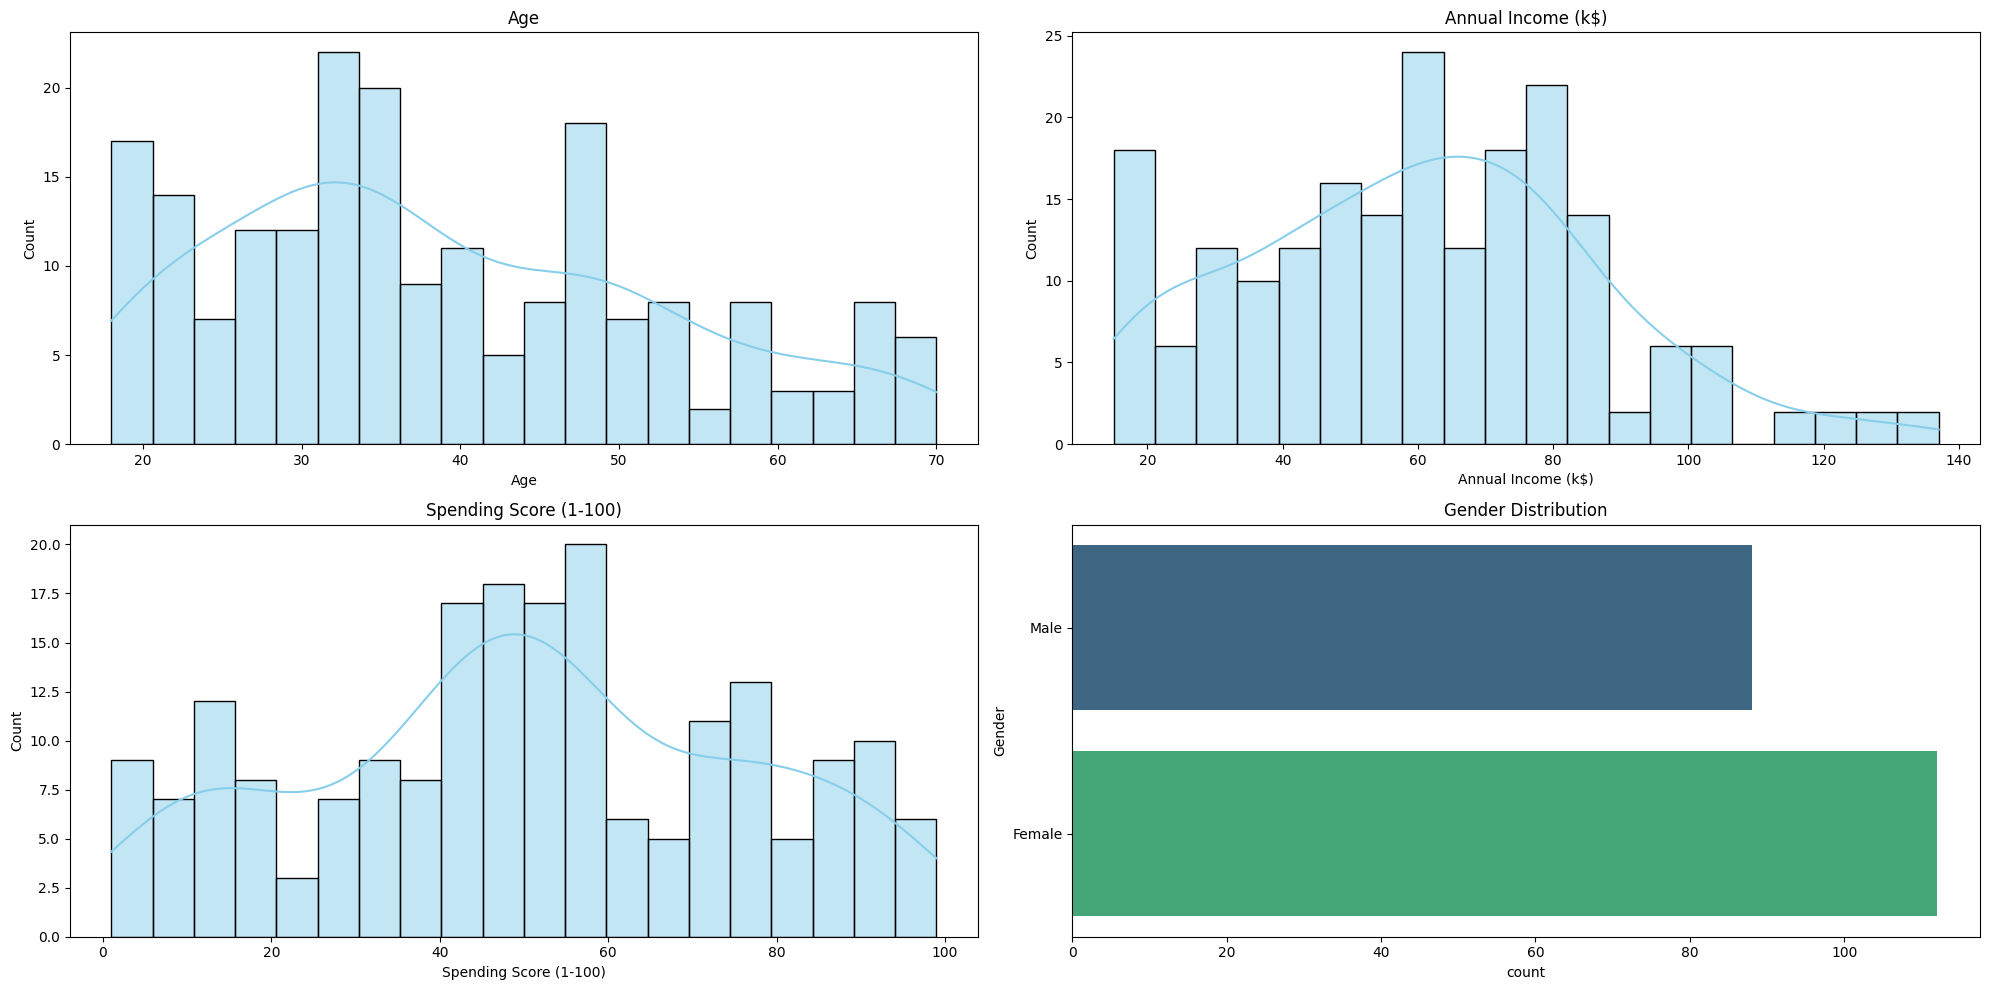

In [8]:
print("---------------- Histograms of the data before scaling ----------------")
plot_histograms(data)

<B>Observations:</B>
Outliers in the Annual Income (k$) have been treated and there are no outliers in the dataset now.

<B>Scaling of data:</B>

Scaling is crucial for effective clustering using techniques like KMeans and DBSCAN because these algorithms rely on distance metrics to determine the similarity between data points. When features have different scales, it can distort the distance calculations and lead to suboptimal clustering results. Here are some key reasons why scaling is important:
1. Equal Contribution of Features
2. Improved Distance Calculations
3. Consistent Interpretation of Clusters
4. Reduction in algorithm Sensitivity



Selected Features:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
Scaled data:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980
---------------- Histograms of the data after scaling ----------------
# of Numeric columns: 3
# of Categorical columns: 0
Categorical columns not present. Skipping plotting of categorical columns.


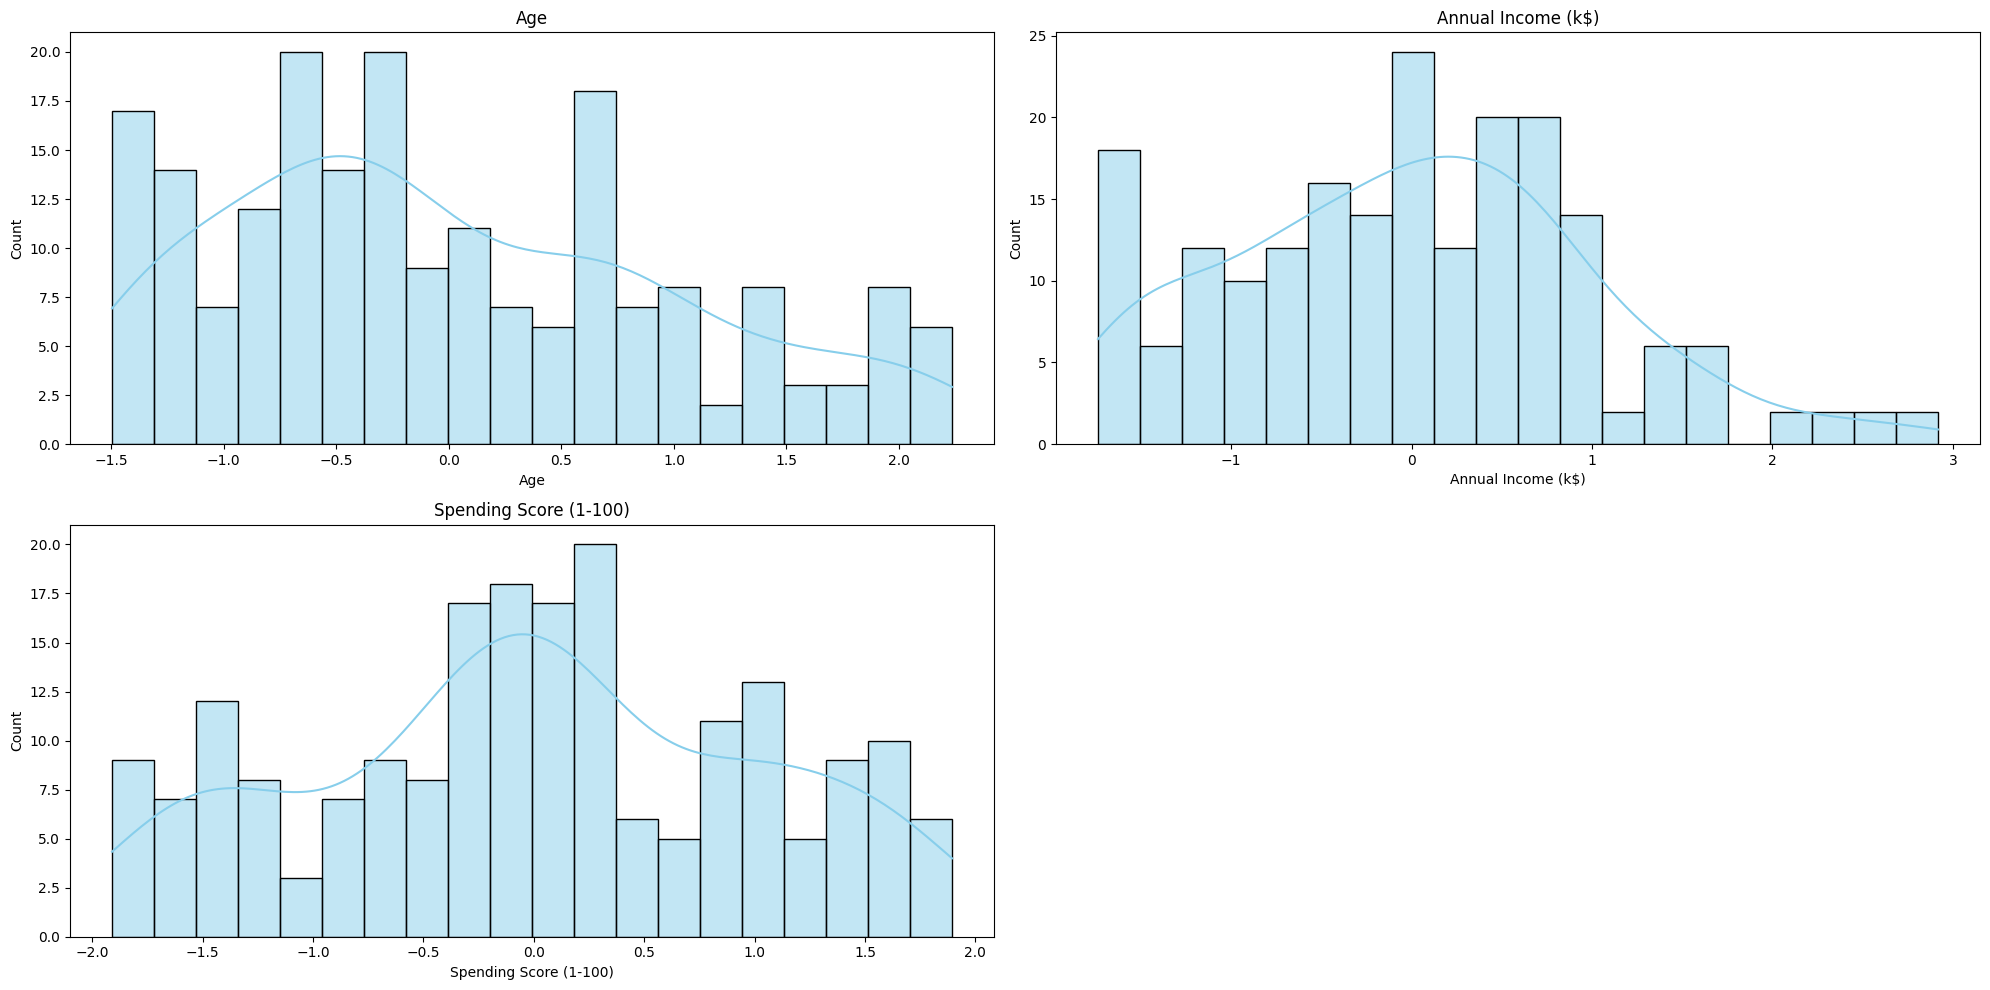

In [9]:
#get numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
selected_features = data[numeric_columns]
print("Selected Features:")
print(selected_features.head())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

print("Scaled data:")
print(pd.DataFrame(scaled_data, columns=selected_features.columns).head())

print("---------------- Histograms of the data after scaling ----------------")
plot_histograms(pd.DataFrame(scaled_data, columns=selected_features.columns))

<H4>2. Enhanced Clustering with K-Means </H4>

KMeans is a centroid-based clustering algorithm that partitions the data into k clusters, where each cluster is represented by the mean of its points (centroid). KMeans is an iterative algorithm which starts with randomly initialized clusters. The centroids and clusters are updated in each iteration until convergence.

---------- Scatter plot of 'Annual Income' vs. 'Spending Score' ----------------


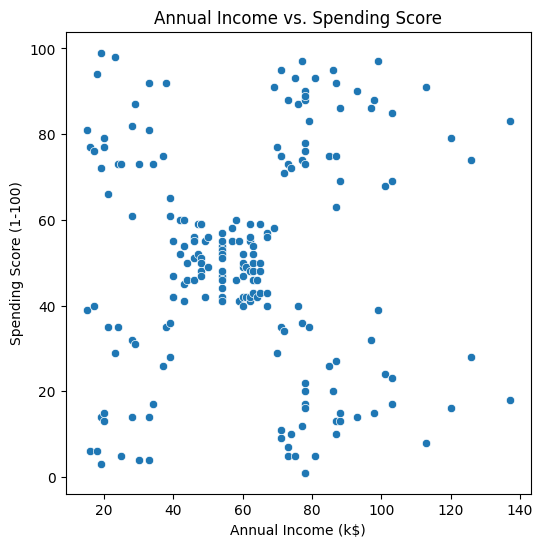

In [10]:
# Scatter plot of 'Annual Income' vs. 'Spending Score'
print("---------- Scatter plot of 'Annual Income' vs. 'Spending Score' ----------------")
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs. Spending Score')
plt.show()

<B>Observations:</B> The scatter plot shows the following information:
- Customers with higher spending scores between 80 - 100 are present in both low-income ($20K-$40K) as well as in high-income (80K-120K) groups, but there are a higher number of high-income high-spenders, as is to be expected. However it is interesting that there are high-spenders in low-income groups as well.
- It is also interesting that there are also high-income customers who are also low spenders.
- The presence of clusters or groups of customers with clustered spending scores in the scatterplot also indicates that we can use K-means or DBSCAN etc, algos to perform customer segmentation.

In [11]:
def plot_clusters(axes, num_clusters, x_label, y_label, cluster_name, scaled_selected_features, original_selected_features, clusters):

    # Create a mesh grid
    x_min, x_max = scaled_selected_features[:, 0].min() - 1, scaled_selected_features[:, 0].max() + 1
    y_min, y_max = scaled_selected_features[:, 1].min() - 1, scaled_selected_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Predict the cluster for each point in the mesh grid
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Inverse transform the mesh grid to original scale
    xx_orig = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])[:, 0].reshape(xx.shape)
    yy_orig = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(yy.shape)

    # Plot the decision boundary
    # plt.figure(figsize=(10, 6))
    # plt.contourf(xx_orig, yy_orig, Z, alpha=0.3, cmap='viridis')
    axes.contourf(xx_orig, yy_orig, Z, alpha=0.3, cmap='viridis')
    # plt.scatter(original_selected_features[:, 0], original_selected_features[:, 1], c=scaled_data_df['5_Clusters'], cmap='viridis', edgecolor='k')
    #plt.scatter(original_selected_features[:, 0], original_selected_features[:, 1], c=clusters, cmap='viridis', edgecolor='k')
    sns.scatterplot(x=x_label, y=y_label, data=clusters, hue=cluster_name, palette='viridis', ax=axes)
    # plt.title('KMeans Clustering with Decision Boundaries')
    axes.set_title(cluster_name)
    # axes.legend()

    return axes
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

Number of clusters: 3
Plot number: 0
Average number of points in each cluster: 66.66666666666667
Number of clusters: 4
Plot number: 1
Average number of points in each cluster: 50.0
Number of clusters: 5
Plot number: 2
Average number of points in each cluster: 40.0
Number of clusters: 6
Plot number: 3
Average number of points in each cluster: 33.333333333333336


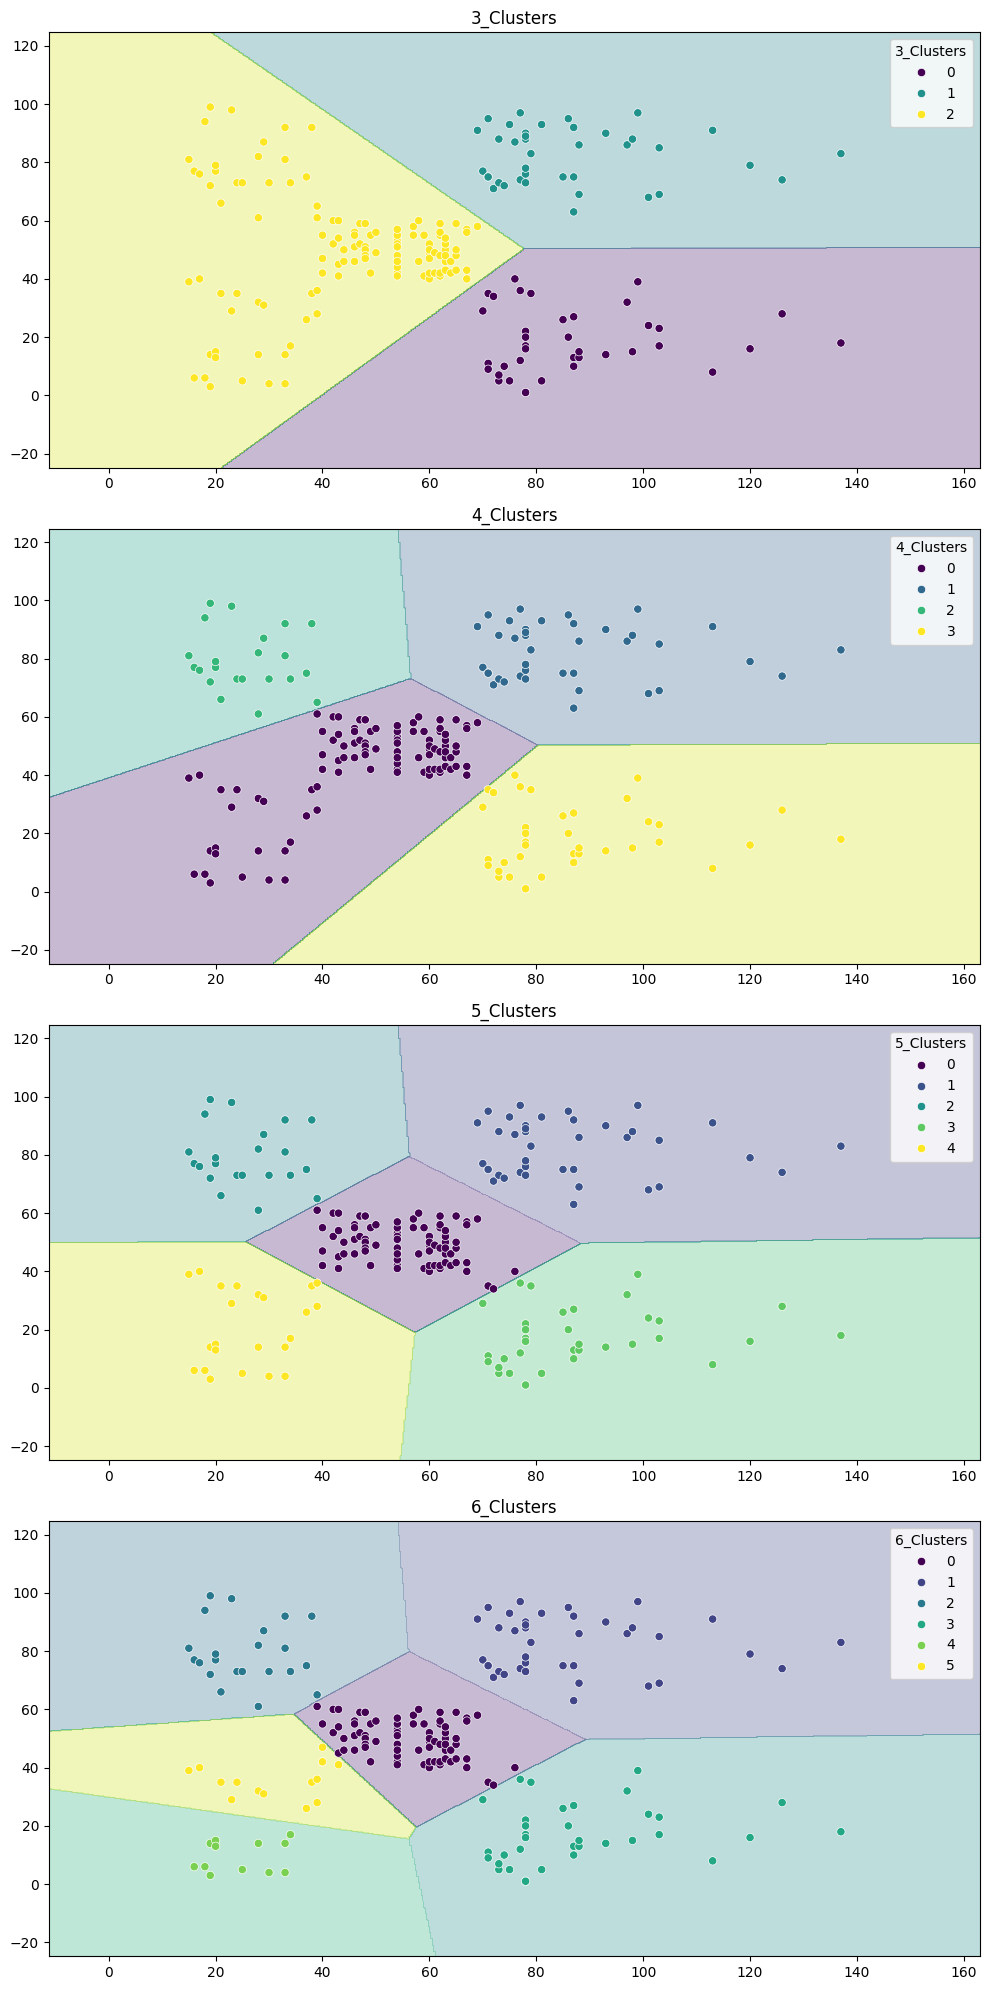

Cluster centers in the standardized feature space:
   Annual Income (k$)  Spending Score (1-100)
0           56.051948               49.857143
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           24.583333                9.583333
5           31.533333               35.866667


In [12]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
import seaborn as sns

# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the selected features
scaler = StandardScaler()
scaled_selected_features = scaler.fit_transform(selected_features)

# Visualize the clusters (for two features)
# Plot the various clustering results in a set of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
axes = axes.flatten()

for i in range(4):
    plot_num = i
    num_clusters = 3 + plot_num
    print("Number of clusters:", num_clusters)
    print("Plot number:", plot_num)
    print("Average number of points in each cluster:", len(data) / num_clusters)
    
    # Apply KMeans clustering with 5 clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    scaled_data_df = pd.DataFrame(scaled_selected_features, columns=selected_features.columns)
    cluster_name = str(num_clusters)+'_Clusters'
    scaled_data_df[cluster_name] = kmeans.fit_predict(scaled_selected_features)

    # Inverse transform the scaled data to original scale
    original_selected_features = scaler.inverse_transform(scaled_selected_features)

    x_label = original_selected_features[:, 0]
    y_label = original_selected_features[:, 1]
    plot_clusters(axes[plot_num], num_clusters, x_label, y_label, cluster_name, scaled_selected_features, original_selected_features, scaled_data_df)

plt.tight_layout()
plt.show()

# Display the cluster centers (in the standardized feature space)
print("Cluster centers in the standardized feature space:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features.columns)
print(cluster_centers_df)

### Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


------- Elbow Method -------
WCSS for different number of clusters:
 k=1: WCSS = 400.0
 k=2: WCSS = 273.6688866264201
 k=3: WCSS = 157.70400815035947
 k=4: WCSS = 109.22822707921345
 k=5: WCSS = 65.56840815571681
 k=6: WCSS = 60.13287487193422
 k=7: WCSS = 49.668244837367986
 k=8: WCSS = 37.31912287833883
 k=9: WCSS = 32.49508119910091
 k=10: WCSS = 30.05932269404221


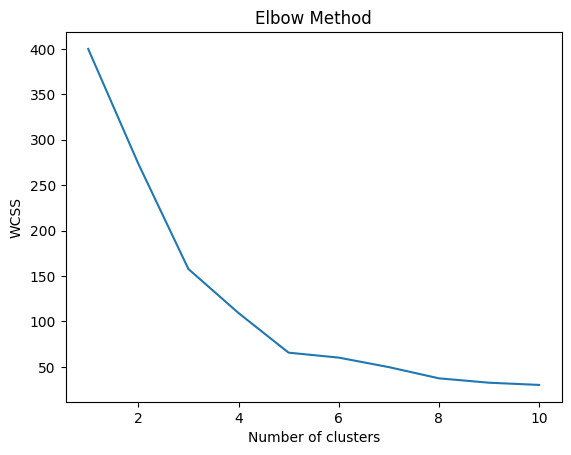

In [13]:
from sklearn.cluster import KMeans

print("------- Elbow Method -------")
#draw an elobow plot to determine the optimal number of clusters. 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_selected_features)
    wcss.append(kmeans.inertia_)

# Printing WCSS values
print("WCSS for different number of clusters:")
for i, value in enumerate(wcss):
    print(f" k={i+1}: WCSS = {value}")

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<B>Observations</B>
- The elbow graph indicates that the optimal number of clusters is between 4 and 6 i.e 5.

------- Silhouette Score Method -------
Silhouette Scores for different number of clusters:
 k=2: Silhouette Score = 0.3973270007887498
 k=3: Silhouette Score = 0.46658474419000145
 k=4: Silhouette Score = 0.49434988482196796
 k=5: Silhouette Score = 0.5546571631111091
 k=6: Silhouette Score = 0.513825753467656
 k=7: Silhouette Score = 0.50200146805547
 k=8: Silhouette Score = 0.4550112502601921
 k=9: Silhouette Score = 0.4566624374485964
 k=10: Silhouette Score = 0.44475993501732874


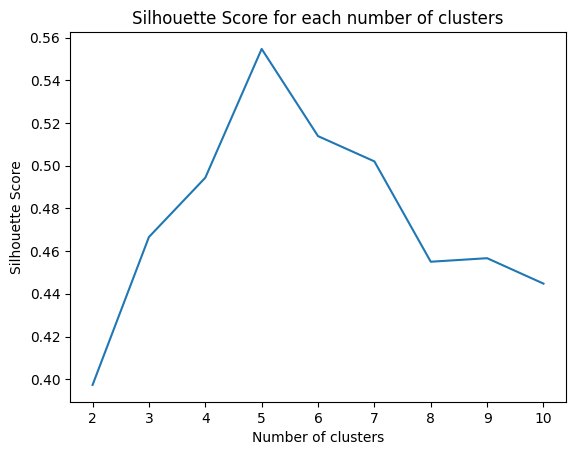

In [14]:
from sklearn.metrics import silhouette_score

print("------- Silhouette Score Method -------")
silhouette_coefficients = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_selected_features)
    score = silhouette_score(scaled_selected_features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Printing silhouette scores
print("Silhouette Scores for different number of clusters:")
for i, score in enumerate(silhouette_coefficients):
    print(f" k={i+2}: Silhouette Score = {score}")

plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

<B>Observations:</B>
- The silhoutte graph peaks at 5. This indicates that the optimal number of clusters in the dataset is 5.

<H4>3. Advanced Implementation of Hierarchical Clustering</H4>

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It can be divided into two main types: agglomerative (bottom-up) and divisive (top-down). It does not require specification of number of clusters in advance and uses various distance metrics (e.g., Euclidean, Manhattan) to measure the similarity between clusters.

------- Hierarchical Clustering -------


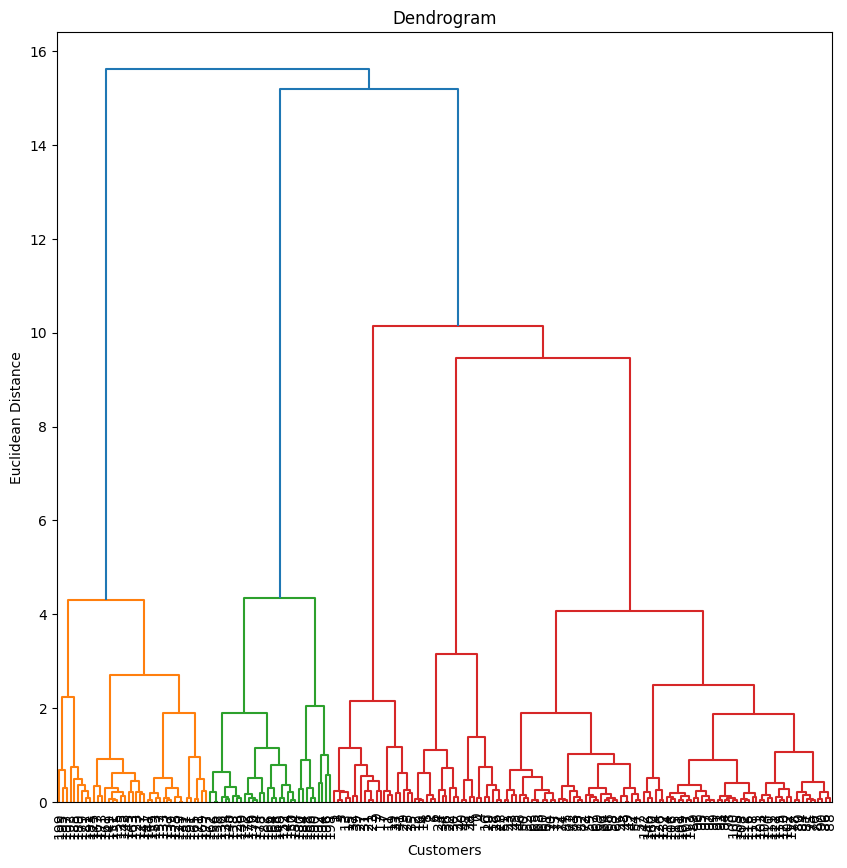

Hierarchical Labels:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 5 1
 2 1 2 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Number of Hierarchical Clusters:  5


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Create a hierarchical cluster
# Analyze the dendrogram to determine the optimal number of clusters.
print("------- Hierarchical Clustering -------")

# Perform hierarchical clustering
Z = linkage(scaled_selected_features, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10))
dendrogram(Z)
plt.title('Dendrogram')
#plot the x-axis labels vertically
plt.xticks(rotation=90)
#increase the font size of the x-axis labels
plt.xticks(fontsize=10)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Determine the optimal number of clusters and form clusters
# The number of vertical lines intersected by this horizontal line represents the number of clusters.
max_d = 5  # Example threshold to cut the dendrogram
hierarchical_labels = fcluster(Z, max_d, criterion='distance')
print("Hierarchical Labels: ",hierarchical_labels)
print("Number of Hierarchical Clusters: ",len(np.unique(hierarchical_labels)))

<B> Observations: </B>
- A dendogram is a tree-like diagram that records the sequences of merges or splits. The height of the merges indicates the distance between merging clusters.
- The above dendrogram suggests that 5 clusters can be a suitable choice for hierarchical clustering. This is same as the optimal clusters determined using elbow graoh and silhoutte scores derived from KMeans results.

<H4>4. Comprehensive Cluster Analysis</H4>

We implemented the following models and techniques to perform customer data segmentation. Their results are summarized below.

<B>KMeans Clustering Visualization</B>
- **Scatter Plot**: This graph shows the clusters formed by KMeans with k=5.
- **Cluster Insights**: Distinct groupings based on 'Annual Income' and 'Spending Score' are visible, indicating varying customer segments.

<B>WCSS and the Elbow Method:</B>
- **Elbow Method**: This method uses WCSS (Within-Cluster Sum of Squares) which is the sum of the squared distances between each point and the centroid of its cluster. WCSS is calulated for various cluster numbers and plotted to obtain the Elbow graph. The 'elbow' point, where the rate of decrease sharply changes, indicates the optimal number of clusters.
- **Elbow Method Results**: From the graph, the WCSS decreases significantly until 5 clusters and then plateaus, suggesting that increasing the number of clusters beyond 5 yields diminishing returns.

<B>Silhouette Scores Method:</B>
- **Silhouette Score**: It is a measure ranging from -1 to 1 that indicates how close each point in one cluster is to points in the neighboring clusters. A higher score indicates better-defined clusters.
- **Silhoutte Scores Results:**: The silhouette score is highest for k=5, which confirms the choice of 5 clusters as optimal, providing a balance between cluster cohesion and separation.

<B>Hierarchical Clustering Dendrogram</B>
- **Dendrogram**: This is a tree-like diagram that records the sequences of merges or splits. The height of the merges indicates the distance between merging clusters.
- **Dendogram Results**: The dendrogram suggests that 5 clusters can also be a suitable choice when considering hierarchical clustering, aligning with KMeans results.


<B>Conclusions:</B>
- The mall customers can be segmented into 5 groups, each with distinct purchasing behaviors and income levels.
- The characteristics of these groups can help formulate customer-specific engagement strategies, marketing campaigns, and resource allocation.


## Extra Credit Assignment (50 points total)

#### Advanced Clustering Techniques (20 points)
- **DBSCAN Clustering**:
  - Implement DBSCAN and compare its segmentation with K-Means and Hierarchical clustering.
  - Analyze the clusters formed by DBSCAN for any unique characteristics.
- **Points**: Quality of implementation and comparative analysis.

#### Dimensionality Reduction Technique (15 points)
- **Principal Component Analysis (PCA)**:
  - Apply PCA to the data and visualize the results.
  - Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.
- **Points**: Effectiveness of PCA implementation and analysis of its impact.

#### Real-world Application Scenario (15 points)
- **Scenario Development and Justification**:
  - Develop a detailed business scenario utilizing the clustered data.
  - Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.
- **Points**: Creativity and practicality in scenario development and justification of techniques.

<H3>Advance Clustering Technique - DBSCAN</H4>

DBSCAN stands for Density-Based Spatial Clustering Of Applications With Noise. DBSCAN groups together points that are closely packed together, marking points that are in low-density regions as outliers.

DBSCAN algorithm uses the following parameters:
eps: The maximum distance between two points to be considered as neighbors.
min_samples: The minimum number of points required to form a dense region (core point).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Apply DBSCAN clustering
# Note that scaled, selected features dataset is constructed above, as part of KMeans clustering analysis
# selected_features are 'Annual Income (k$)' and 'Spending Score (1-100)'

# Note: The eps and min_samples are hyperparameters that need to be tuned based on the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
scaled_selected_features_df = pd.DataFrame(scaled_selected_features, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
scaled_selected_features_df['Cluster'] = dbscan.fit_predict(scaled_selected_features)

# Calculate silhouette score for DBSCAN
silhouette_avg_dbscan = silhouette_score(scaled_data, scaled_selected_features_df['Cluster'])
print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')

# Visualize the clusters (for two features)
plt.title('Customer Segmentation using DBSCAN')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=scaled_selected_features_df['Cluster'], palette='viridis', data=data)
plt.show()

# Display the number of clusters and noise points
n_clusters = len(set(scaled_selected_features_df['Cluster'])) - (1 if -1 in scaled_selected_features_df['Cluster'] else 0)
n_noise = list(scaled_selected_features_df['Cluster']).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

<B>Observations:</B> After running DBSCAN with `eps=0.5` and `min_samples=5`, we observe the following:

- Cluster Formation: The algorithm has identified several clusters, which are color-coded in the scatter plot, and some points are labeled as noise (indicated by `-1`).
- Silhouette Score: The model has a silhouette score of `0.21`, which suggests a fair level of separation and cohesion among the identified clusters.

<H4>Parameter Tuning for DBSCAN using Grid Search</H4>

Optimal parameter values can be determined for the parameters eps and min_samples using brute force grid search in order to improve the silhoutte scores and increase separation and cohesion amongst clusters.

In [ ]:
# Determine optimal values for eps and min_samples using grid search optimization
from sklearn.metrics import silhouette_score

# Define the parameter grid
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 5, 7, 10, 12, 15, 20]
best_silhoutte_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_selected_features)
        
        # Determine the number of clusters (ignoring noise as a cluster)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Check if the clustering resulted in more than one cluster
        if n_clusters > 1:
            score = silhouette_score(scaled_selected_features, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}, number of clusters: {n_clusters}")
            if score > best_silhoutte_score:
                best_silhoutte_score = score
                best_params = (eps, min_samples)

if best_params:
    print(f"Best params: eps={best_params[0]}, min_samples={best_params[1]}, silhouette score={best_silhoutte_score}")
else:
    print("No valid clustering found.")

# Apply DBSCAN with the best parameters
if best_params:
    dbscan_optimized = DBSCAN(eps=best_params[0], min_samples=best_params[1])
    labels = dbscan_optimized.fit_predict(scaled_selected_features)
    
    # Visualize the clusters
    plt.title('Customer Segmentation using DBSCAN (Optimized)')
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, palette='viridis', data=scaled_selected_features_df)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

<B>Observation:</B> After finetuning, the new best parameters for eps=0.5 and min_samples=10 produce an improved silhoutte score of 0.41 with the DBSCAN algorithm. The visualization of the DBSCAN results shows 5 clusters as an optimal segmentation of customer data. This segmentation is in agreement with the earlier results obtained using KMeans and Hierarchical clustering techniques.

<H4>Dimensionality Reduction Using Principal Component Analysis (PCA)</H4>

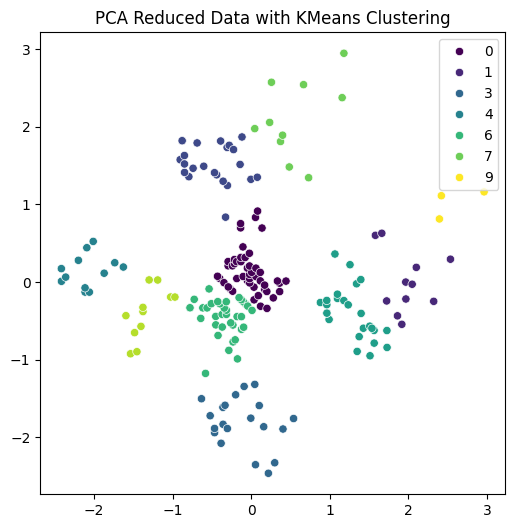

Explained variance by component: [0.50495142 0.49504858]


In [22]:
#Reduce the number of features using PCA
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_selected_features)

# Visualize the PCA-reduced data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('PCA Reduced Data with KMeans Clustering')
plt.show()

# Percentage of variance explained by each of the selected components
print(f'Explained variance by component: {pca.explained_variance_ratio_}')

<B>Observations:</B>
- The PCA process has transformed the dataset into a two-dimensional space that is easier to visualize and interpret for segmentation.
- PCA has shown that two principal components are sufficient to explain the all the variance in the dataset:
  - Principal Component 1: 50.5%
  - Principal Component 2: 49.5%
- The distribution of the data across the two components is almost equal and it indicates that both components are equally important.
- Since the total of the distribution across the two components is 100%, it shows that dimensionality reduction has been performed without any information loss.

Silhouette Score for KMeans after PCA: 0.5546571631100179



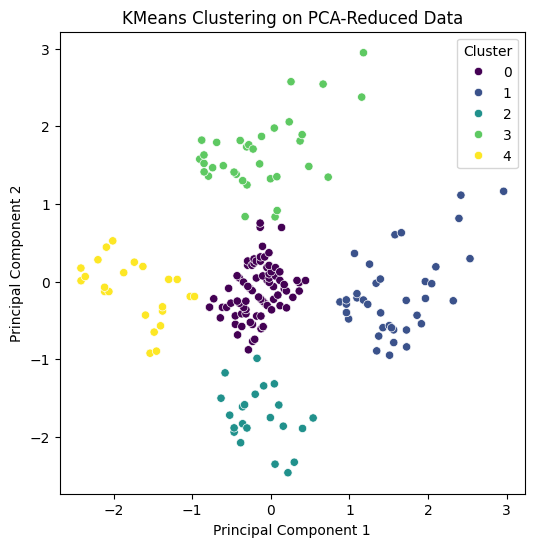

In [24]:
# Apply KMeans clustering on the PCA-reduced data
# Use the same number of clusters as determined to be optimal in the previous KMeans clustering
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(pca_data)

# Calculate silhouette score for the KMeans clustering on PCA-reduced data
silhouette_avg_pca = silhouette_score(pca_data, kmeans_pca.labels_)
print(f"Silhouette Score for KMeans after PCA: {silhouette_avg_pca}\n")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca.labels_, palette='viridis')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

<H4>Real-world Application Scenario</H4>

<H5>Key Insights from Customer Data Segmentation Analysis:</H5>

- <B>Segmentation:</B> The cluster analysis above shows that the set of customers can be segmented into 5 clusters with distinct purchasing behaviors and income levels.

- <B>Customer Insights:</B> Understanding the customer segments helps in creating personalized experiences and offers for different customer groups.

<H5>Business Scenario and Strategies</H5>

- <B>Business Strategy Formulation:</B> The data-driven segmentation of customers into 5 clusters,based on their income and spending patterns, can be used effectively to construct marketing and service strategies customized to the customers in the clusters. The 5 clusters are: Low-Income-Low-Spending, Low-Income-High-Spending, High-Income-Low-Spending, High-Income-High-Spending and Average-Income-Average-Spending.

    - <B>Low-Income-Low-Spending Group:</B> This group may not have disposable income and are conservative spenders. They maybe interested in installment-based purchases where they can pay small sums of money over a period ot time to acquire goods of immediate value rather than luxury items.
    - <B>Low-Income-High-Spending Group:</B> This group is spending even though they do not have the income to support their spending. As such they maybe interested in loan-based products. But loan default analysis is required before offering products since they are riskier to sell to.
    - <B>Average-Income-Average-Spending Group:</B> This group has a lower amount of disposable income and can be interested in larger value items offered as installment-based purchases. They may also increase spending as their income increases.
    - <B>High-Income-Low-Spending Group:</B> This group is conservative in spending even though they have high income. They are typically value-buyers and may look to purchase branded or luxury items once in a while, maybe during discounting seasons.
    - <B>High-Income-High-Spending Group:</B> This group has high disposable income and, for them, price is not a barrier for purchasing. They can be marketed luxury or branded goods


- <B>Business Implications:</B> A one-size-fits-all business strategy rarely succeeds and it is important to understand and take into account customer behavior and expectations when creating marketing and service strategies. Analysis of customer data can provide key insights into customer metrics like income, age and spending and in turn, these insights can help in the design of customer engagement strategies, marketing campaigns, and resource allocation.

<H5>Conclusions</H5>
Using a data-driven approach, we were able to glean insights into customer income and spending behavior. This enabled us to construct customer-specific marketing approaches which could appeal to the customers better than a generic marketing plan. Since this is data-driven, we can enhance it to include more dimensions such as age etc. to further customize the marketing plans. Also, this approach allows us to build flexible strategies that can be continuously monitored and updated to account for new products and changes in customer behavior.